In [54]:
import pandas as pd
import matplotlib.pyplot as plt

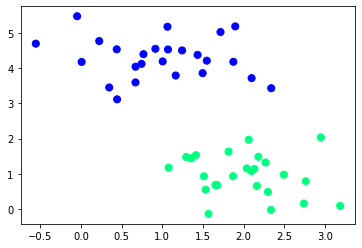

In [55]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.60)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')

In [56]:
from sklearn.svm import SVC

In [57]:
svc = SVC(kernel='linear',C=1)
svc.fit(X,y)

SVC(C=1, kernel='linear')

In [58]:
from sklearn.datasets import make_circles

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

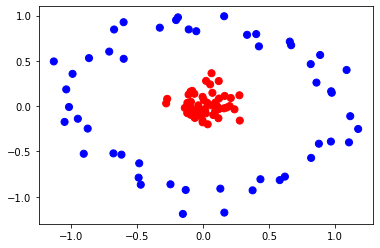

In [60]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(X_train.ndim)
print(X_test.ndim)

(80, 2)
(20, 2)
2
2


In [63]:
print(y_train.shape)
print(y_test.shape)
print(y_train.ndim)
print(y_test.ndim)

(80,)
(20,)
1
1


In [64]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.35

In [66]:

zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


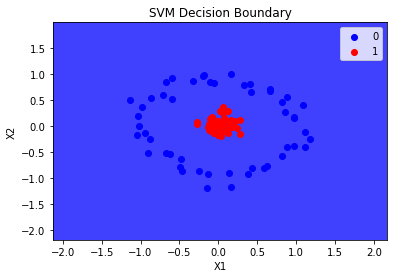

In [67]:
plot_decision_boundary(X, y, classifier)

In [76]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

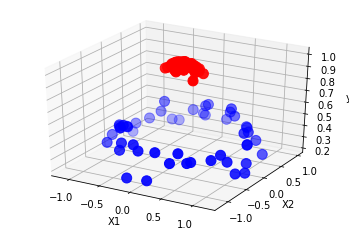

In [77]:
plot_3d_plot(X,y)

In [26]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


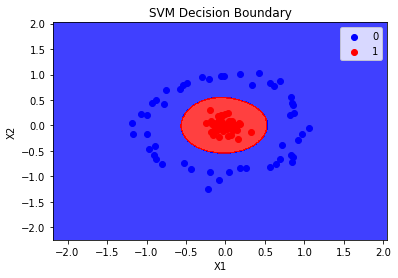

In [28]:
plot_decision_boundary(X, y, rbf_classifier)

#### SVM on a dataset

In [32]:
import pandas as pd 
from sklearn import svm
import seaborn as sns

In [33]:
df = sns.load_dataset('iris')

In [36]:
X = df.drop("species",axis=1)
Y = df["species"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [39]:
clf = svm.SVC(C=4,kernel='rbf')

In [40]:
clf.fit(X_train,Y_train)

SVC(C=4)

In [41]:
test_pred = clf.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve

In [46]:
def plot_confusion_matrix(y_true,y_pred,Train,Test):
    if Train:
        sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt="d",cbar=False,cmap="YlGnBu")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.title("Training data confusion matrix")
        df_cm = pd.DataFrame(data=confusion_matrix(y_true,y_pred),columns = ["Predicted : 0","Predicted : 1"],index=["Actual : 0","Actual : 1"])
        return df_cm
    else:
        sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,fmt="d",cbar=False,cmap="YlGnBu")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.title("Testing data confusion matrix")
        df_cm = pd.DataFrame(data=confusion_matrix(y_true,y_pred),columns = ["Predicted : 0","Predicted : 1"],index=["Actual : 0","Actual : 1"])
        return df_cm

In [49]:
confusion_matrix(test_pred,Y_test)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)